# Creating Auto-Encoder

In [1]:
### Loading Libraries

import os
import sys
import numpy                              as np
import pandas                             as pd

import matplotlib
from matplotlib                           import pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

import tensorflow                         as tf

import romnet                             as rmnt

In [2]:
### Input Data

OutputDir          = WORKSPACE_PATH+'/ROMNet/Data/PSR_100Cases/'

NVarsRed           = 3

ValidPerc          = 20.

FixedMinVal        = 1.e-10

In [3]:
Data      = pd.read_csv(OutputDir+'/Orig/train/ext/CleanVars.csv', header=None)
orig_vars = list(Data.to_numpy()[0,:])

red_vars  = ['i'+str(i+1) for i in range(NVarsRed)]

In [4]:
Data      = pd.read_csv(OutputDir+'/Orig/train/ext/Output.csv')
orig_data = Data[orig_vars].to_numpy()

In [5]:
mod_data      = np.stack([np.log10(orig_data[:,i]) if i>0 else orig_data[:,i] for i in range(orig_data.shape[1])], axis=1)
mod_data[:,0] = (mod_data[:,0] - mod_data[:,0].min()) / (mod_data[:,0].max() - mod_data[:,0].min())

In [6]:
from sklearn.model_selection import train_test_split
mod_data_train, mod_data_test = train_test_split(mod_data, test_size=0.25, random_state=42)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='tanh', input_shape=(orig_data.shape[1],)))
model.add(Dense(8,  activation='tanh'))
model.add(Dense(3,  activation='tanh'))
model.add(Dense(8,  activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(orig_data.shape[1], activation='tanh'))
model.add(Dense(orig_data.shape[1], activation='linear'))

In [19]:
from tensorflow.keras.optimizers import Adam

opt = tf.keras.optimizers.Adam(learning_rate=1.e-3)
model.compile(optimizer=opt, loss='mean_squared_error')

model.fit(x=mod_data_train, y=mod_data_train, epochs=100, batch_size=32)

Epoch 1/100
2344/2344 [==============================] - 3s 996us/step - loss: 5.3629
Epoch 2/100
2344/2344 [==============================] - 2s 1ms/step - loss: 0.0937
Epoch 3/100
2344/2344 [==============================] - 2s 1ms/step - loss: 0.0419
Epoch 4/100
2344/2344 [==============================] - 3s 1ms/step - loss: 0.0311
Epoch 5/100
2344/2344 [==============================] - 3s 1ms/step - loss: 0.0283
Epoch 6/100
2344/2344 [==============================] - 3s 1ms/step - loss: 0.0141
Epoch 7/100
2344/2344 [==============================] - 3s 1ms/step - loss: 0.0057
Epoch 8/100
2344/2344 [==============================] - 3s 1ms/step - loss: 0.0048
Epoch 9/100
2344/2344 [==============================] - 3s 1ms/step - loss: 0.0046
Epoch 10/100
2344/2344 [==============================] - 3s 1ms/step - loss: 0.0048
Epoch 11/100
2344/2344 [==============================] - 3s 1ms/step - loss: 0.0045
Epoch 12/100
2344/2344 [==============================] - 3s 1ms/step - 

KeyboardInterrupt: 

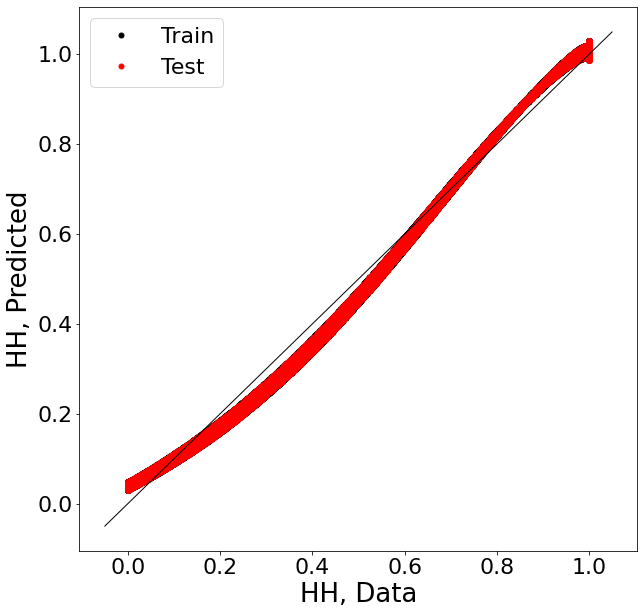

In [26]:
i_dim = 0

pred_data_train = model.predict(mod_data_train)
pred_data_test  = model.predict(mod_data_test)

#pred_data = np.stack([10**(pred_data[:,i]) if i>0 else pred_data[:,i] for i in range(pred_data.shape[1])], axis=1)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(mod_data_train[:,i_dim], pred_data_train[:,i_dim], 'ko', markersize=5, label='Train')
ax.plot(mod_data_test[:,i_dim],  pred_data_test[:,i_dim],  'ro', markersize=5, label='Test')
ax.set_xlabel(orig_vars[i_dim]+', Data')
ax.set_ylabel(orig_vars[i_dim]+', Predicted')
ax.legend()
xlim = ax.get_xlim()
ylim = ax.get_xlim()
plt.plot(xlim,ylim,'k-',linewidth=1)